In [11]:
# jumlah suku yang mau ditampilkan
nterms = int(input("Masukkan jumlah suku Fibonacci: "))

# first two terms
n1, n2 = 0, 1
count = 0

# check if the number of terms is valid
if nterms <= 0:
    print("Please enter a positive integer")
elif nterms == 1:
    print("Fibonacci sequence up to", nterms, ":")
    print(n1)
else:
    print("Fibonacci sequence:")
    while count < nterms:
        print(n1)
        nth = n1 + n2
        # update values
        n1 = n2
        n2 = nth
        count += 1


Fibonacci sequence:
0
1
1
2
3
5
8
13
21
34
55
89


In [12]:
# Fibonacci dengan while
nterms = int (input("How many terms? "))
n1, n2 = 0, 1
count = 0

if nterms <= 0:
    print("Please enter a positive integer")
elif nterms == 1:
    print("Fibonacci sequence upto", nterms, ":")
    print(n1)
else:
    print("Fibonacci sequence:")
    while count < nterms:
        print(n1)
        nth = n1 + n2
        n1 = n2
        n2 = nth
        count += 1

Fibonacci sequence:
0
1
1
2
3
5
8
13
21
34


In [13]:
#Fibonacci dengan rekursi

def recur_fibo(n):
    if n <= 1:
        return n
    else:
        return(recur_fibo(n-1) + recur_fibo(n-2))

nterms = 20

if nterms <= 0:
    print("Please enter a positive integer")
else:
    print("Fibonacci sequence:")
    for i in range(nterms):
        print(recur_fibo(i))

Fibonacci sequence:
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


In [14]:
# Latihan Fibonacci rekursi

def recur_fibo(n):
    if n <= 1:
        return n
    else:
        return(recur_fibo(n-1) + recur_fibo(n-2))

nterms = 30

if nterms <= 0:
    print("Please enter a positive integer")
else:
    print("Fibonacci sequence:")
    for i in range(nterms):
        print(recur_fibo(i))

Fibonacci sequence:
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229


In [12]:
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import itertools

In [15]:
#Try All Tours (exact_TSP)
def exact_TSP(cities):
    "Generate all possible tours and select the shortest one."
    return shortest(alltours(cities))

def shortest(tours):
    "Return the tour with the shortest distance."
    return min(tours, key=total_distance)

In [16]:
#Try All Tours (exact_TSP)
def exact_TSP(cities):
    "Generate all possible tours and select the shortest one."
    return shortest(alltours(cities))

def shortest(tours):
    "Return the shortest tour from a sequence of tours."
    return min(tours, key=total_distance)

In [17]:
#Representing Tours
alltours = itertools.permutations #The permutation function is already defined in the itertools module

cities = ['1', '2', '3']

list(alltours(cities))

[('1', '2', '3'),
 ('1', '3', '2'),
 ('2', '1', '3'),
 ('2', '3', '1'),
 ('3', '1', '2'),
 ('3', '2', '1')]

In [1]:
#Representing Cities and Distance
def total_distance(tour):
  "The total of distances between each pair of consecutive cities in the tour."
  return sum(distance_points(tour[i - 1], tour[i])
    for i in range(1, len(tour)))

In [18]:
City = complex # Constructor for new cities, e.g City(300, 400)

def distance_points(A, B):
  "The distance between two points."
  return abs(A - B)

In [19]:
A = City(300, 0)
B = City(0, 400)
distance_points(A, B)

500.0

In [20]:
def Cities(n):
    "Make a set of n cities, each with random coordinates."
    return set(City(random.randrange(10, 890), random.randrange(10, 590)) for c in range(n))

# Let's make some standard sets of cities of various sizes.
# We'll set the random seed so that these sets are the same every time we run this notebook.
random.seed('seed')
cities8, cities10, cities100, cities1000 = Cities(8), Cities(10), Cities(100), Cities(1000)
cities8

{(151+70j),
 (252+365j),
 (303+506j),
 (498+96j),
 (54+361j),
 (551+542j),
 (684+435j),
 (800+430j)}

In [21]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

((800+430j), (684+435j), (551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j))
1540.0995760949477


In [7]:
#Try All Non-Redundant Tours
def alltours(cities):
  "Return a list of tours,  each  a permutation of cities, but each one starting with the same city."
  start = first(cities)
  return [[start] + list(tour)
          for tour in itertools.permutations(cities - {start})]

def first(collection):
    "Start iterating over collection, and return the first element."
    for x in collection: return x

In [22]:
alltours({1, 2, 3})

In [23]:
alltours({1, 2, 3, 4,})

In [24]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

((800+430j), (684+435j), (551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j))
1540.0995760949477


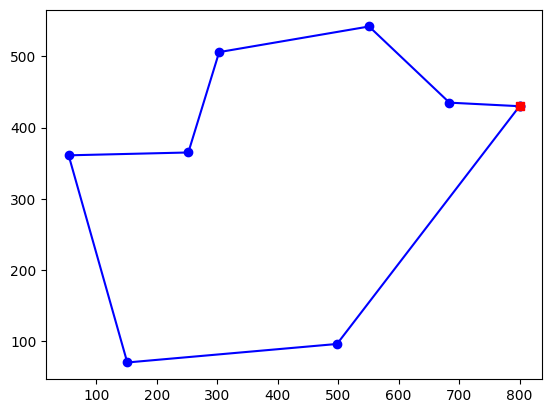

8 city tour; total distance = 1540.1; time = 0.338 secs for exact_TSP


In [25]:
#Plotting
import time

def plot_tour(algorithm, cities):
    "Apply a TSP algorithm to cities, and plot the resulting tour."
    # Find the solution and time how long it takes
    t0 = time.time()
    tour = algorithm(cities)
    t1 = time.time()
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    plotline(list(tour) + [tour[0]])
    plotline([tour[0]], 'rs')
    plt.show()
    print("{} city tour; total distance = {:.1f}; time = {:.3f} secs for {}".format(
          len(tour), total_distance(tour), t1-t0, algorithm.__name__))

def plotline(points, style='bo-'):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    plt.plot(X, Y, style)

def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

plot_tour(exact_TSP, cities8)

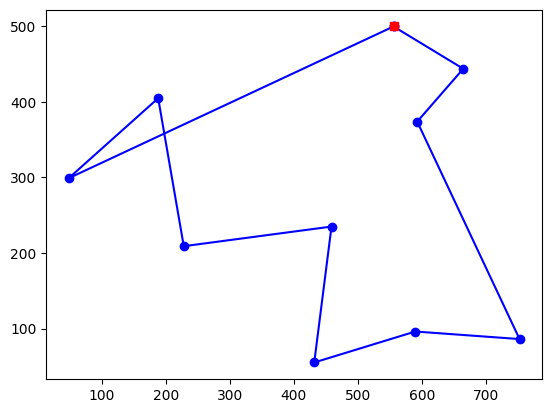

10 city tour; total distance = 1669.1; time = 19.697 secs for exact_TSP


In [26]:
plot_tour(exact_TSP, cities10)

In [ ]:
cities = Cities(9)
plot_tour(exact_TSP, cities)
plot_tour(greedy_TSP, cities)

In [ ]:
plot_tour(greedy_TSP, cities100)
plot_tour(greedy_TSP, cities1000)

In [ ]:
#Greedy Nearest Neighbor (greedy_TSP)

def greedy_TSP(cities):
    "At each step, visit the nearest neighbor that is still unvisited."
    start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda x: distance(x, A))

In [ ]:
#Algorithm 3: Greedy Nearest Neighbor from All Starting Points (all_greedy_TSP)
def all_greedy_TSP(cities):
    "Try the greedy algorithm from each of the starting cities; return the shortest tour."
    return shortest(greedy_TSP(cities, start=c) for c in cities)


# We will modify greedy_TSP to take ann optional start city; otherwise it is unchaged.

def greedy_TSP(cities, start=None):
  "At each step, visit the nearest neighbor that is still unvisited."
  if start is None: start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

In [ ]:
#Algorithm 4: Greedy Nearest Neighbor with Exact End (greedy_exact_end_TSP)
def greedy_exact_end_TSP(cities, start=None, end_size=8):
    """At each step, visit the nearest neighbor that is still unvisited until
    there are k_end cities left; then choose the best of all possible endings."""
    if start is None: start = first(cities)
    tour = [start]
    unvisited = cities - {start}

    # Use greedy algorithm for all but the last end_size cities
    while len(unvisited) > end_size:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)

    # Consider all permutations of possible ends to the tour, and choose the best one.
    # (But to make things faster, omit the middle of the tour.)
    ends = map(list, itertools.permutations(unvisited))
    best = shortest([tour[0], tour[-1]] + end for end in ends)
    return tour + best[2:]

In [ ]:
#Algorithm 5: Greedy Nearest Neighbor with Both Ends Search (greedy_bi_TSP)
import random

def greedy_bi_TSP(cities, start_size=12, end_size=6):
    """
    At each step, visit the nearest neighbor that is still unvisited.
    """
    starts = random.sample(cities, min(len(cities), start_size))
    return shortest([greedy_exact_end_TSP(cities, start, end_size) for start in starts])


In [ ]:
#Benchmarking Algorithms
def compare_algorithms(algorithms, maps):
    "Apply each algorithm to each map and plot results."
    for algorithm in algorithms:
        t0 = time.time()
        results = [total_distance(algorithm(m)) for m in maps]
        t1 = time.time()

        avg = sum(results) / len(results)
        label = '{:.0f}; {:.1f}s: {}'.format(avg, t1-t0, algorithm.__name__)
        plt.plot(sorted(results), label=label)
    plt.legend(loc=2)
    plt.show()
    print('{} x {}-city maps'.format(len(maps), len(maps[0])))

def Maps(M, N):
    "Return a list of M maps, each consisting of a set of N cities."
    return [Cities(N) for m in range(M)]

In [ ]:
def bi_10_6(cities): return greedy_bi_TSP(cities, 10, 6)
def bi_20_5(cities): return greedy_bi_TSP(cities, 20, 5)
def bi_40_4(cities): return greedy_bi_TSP(cities, 40, 4)
def bi_80_2(cities): return greedy_bi_TSP(cities, 80, 2)
def bi_160_1(cities): return greedy_bi_TSP(cities, 160, 1)

algorithms = [bi_10_6, bi_20_5, bi_40_4, bi_80_2, bi_160_1]